In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import levene
from scipy import stats 

In [2]:
df = pd.read_csv('dating_data.csv', sep= ',')
df

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
2,423,677,0,0
3,658,165,1,1
4,969,155,0,1
...,...,...,...,...
14509,476,631,0,0
14510,455,770,1,0
14511,260,6,1,1
14512,885,812,1,1


In [3]:
group_0= df.query('group == "0"')
group_0
# Посмотрим на данные в группе 0

,user_id_1,user_id_2,group,is_match
2,423,677,0,0
4,969,155,0,1
5,227,162,0,0
8,223,295,0,0
10,825,388,0,0
...,...,...,...,...
14502,535,545,0,0
14503,128,268,0,0
14505,544,600,0,0
14506,903,505,0,0


In [4]:
group_1= df.query('group == "1"')
group_1
# И на данные в группе 1

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
3,658,165,1,1
6,435,16,1,0
7,602,327,1,0
...,...,...,...,...
14508,527,647,1,0
14510,455,770,1,0
14511,260,6,1,1
14512,885,812,1,1


In [5]:
# В качестве метрики выберем состоявшийся/несостоявшийся мэтч

In [6]:
group_0.is_match.value_counts(normalize = True).mul(100)
# Посмотрим процентное соотношение состоявшихся и не состоявшихся мэтчей в группе 0

0    80.509182
1    19.490818
Name: is_match, dtype: float64

In [7]:
group_1.is_match.value_counts(normalize = True).mul(100)
# Посмотрим процентное соотношение состоявшихся и не состоявшихся мэтчей в группе 1

0    59.792224
1    40.207776
Name: is_match, dtype: float64

In [8]:
# На первый взгляд в группе 1 намного больше мэтчей. Так как у нас две категориальные переменные (группы 0 и 1 и наличие/отсутсвие мэтча,
# проверим различия с помощью хи-квадрата.

# Нулевая гипотеза - взаимосвязи м/у наличием мэтча и группой нет
# Альтернативная гипотеза - взаимосвязь есть

In [9]:
pd.crosstab(df.is_match, df.group)
# Сделаем для подсчета табличку сопряженностей

group,0,1
is_match,,
0,3858,5813
1,934,3909


In [166]:
chi2_contingency(pd.crosstab(df.is_match, df.group))
# Посмотрим значение хи-квадрата

(618.6889141576197,
 1.441829916366341e-136,
 1,
 array([[3193.01584677, 6477.98415323],
        [1598.98415323, 3244.01584677]]))

In [189]:
# Значение Хи-квадрат :  618.6889141576197
# Отклоняем нулевую гипотезу

In [10]:
# Хи-квадрат p-value:  1.441829916366341e-136
# Отклоняем нулевую гипотезу

In [11]:
#Посмотрим также кол-во показанных пар на пользователя (свайпов)


In [12]:
shows = df.groupby('group', as_index = False) \
.agg({'user_id_1': 'nunique', 'is_match': 'count'})
shows['mean_sh'] = shows.is_match/shows.user_id_1

shows
# Сгруппируем данные по номеру группы, посчитаем кол-во ун-ыхпользователей в каждой и сколько всего показов пар было в каждой группе
# Также создадим колонку - среднее количество показов для пользователя
# На первый взгляд средние отличаются

,group,user_id_1,is_match,mean_sh
0,0,501,4792,9.564870
1,1,499,9722,19.482966


In [13]:
sh_gr_0 = group_0.groupby('user_id_1', as_index = False) \
.agg({'is_match' : 'count'})
sh_gr_0
# Сделаем дф, где отобразим, сколько показов для каждого пользователя было в группе 0

,user_id_1,is_match
0,4,9
1,10,6
2,12,12
3,14,8
4,15,20
...,...,...
496,994,9
497,995,8
498,996,8
499,997,12


In [14]:
sh_gr_1 = group_1.groupby('user_id_1', as_index = False) \
.agg({'is_match' : 'count'})
sh_gr_1
# Также для группы 1

,user_id_1,is_match
0,1,24
1,2,16
2,3,16
3,5,22
4,6,22
...,...,...
494,987,23
495,992,21
496,993,18
497,998,18


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


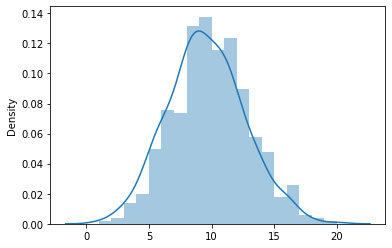

In [15]:
sns.distplot(x=sh_gr_0.is_match)
# Посмотрим распределение кол-ва показов на графике для группы 0

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


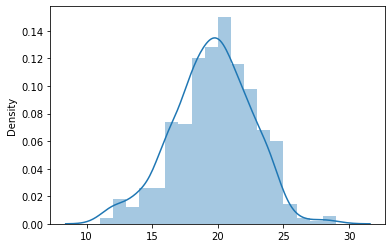

In [16]:
sns.distplot(x=sh_gr_1.is_match)
# Посмотрим распределение кол-ва показов на графике для группы 1

In [176]:
# Распределения выглядят нормальными (на графике)

In [17]:
sh_gr_0.is_match.describe()
# Посмотрим на описательную статистику по показам на пользователя в группе 0

count    501.000000
mean       9.564870
std        3.056515
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       20.000000
Name: is_match, dtype: float64

In [19]:
sh_gr_1.is_match.describe()
# И в группе 1

count    499.000000
mean      19.482966
std        2.991489
min       11.000000
25%       18.000000
50%       20.000000
75%       22.000000
max       29.000000
Name: is_match, dtype: float64

In [20]:
# Кажется, что есть выбросы, проверим нормальность распределений с помощью теста Шапиро-Уилка 

In [21]:
stats.shapiro(sh_gr_0.is_match)

ShapiroResult(statistic=0.9884836673736572, pvalue=0.00055683683604002)

In [22]:
stats.shapiro(sh_gr_1.is_match)

ShapiroResult(statistic=0.9839291572570801, pvalue=2.540682726248633e-05)

In [23]:
# В обоих группах значение pvalue меньше 0.05, значит, распределение отклоняется от нормального, 
# что нормально для таких больших групп

In [24]:
# Проверим различия в двух группах с помощью дисперсионного анализа.
# Перед этим проверим гомогенность дисперсий внутри наших групп.

stat, p = levene(sh_gr_0.is_match, sh_gr_1.is_match)
p
# Дисперсии внутри групп примерно одинаковы.

0.48837808141783545

In [25]:
stats.f_oneway(sh_gr_0.is_match, sh_gr_1.is_match)
# Значение pvalue сильно меньше 0.05,значит, среднее одной группы значимо отличается от среднего второй группы

F_onewayResult(statistic=2688.820489347832, pvalue=1.8942877064054987e-285)

In [ ]:
# По результатам двух проведенных тестов видим, что новую систему поиска анкет стоит  включать  на всех пользователей.
# В группе 1 мы видим статзначимо больше мэтчей (взаимосвязь м/у наличием мэтча и группой есть), а также в группе 1 
# среднее значение состоявшихся показов (свайпов) пары на пользователя значимо больше, чем в группе 0, что означает,что
# пользователи при новом алгоритме стали совершать больше действий в приложении.